<a href="https://colab.research.google.com/github/asmitha1010/asmitha1023/blob/main/ecg_heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn

In [30]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, accuracy_score


In [9]:
df = pd.read_csv("/content/file2.csv")

In [10]:
X = df.drop(["Sample_ID", "Label"], axis=1)
y = df["Label"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation="relu"),
    Dropout(0.2),
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [31]:
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=8,
    restore_best_weights=True
)

In [15]:
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=8,
    verbose=1
)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.5000 - loss: 0.7592 - val_accuracy: 0.5000 - val_loss: 0.8136
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step - accuracy: 0.5000 - loss: 0.7033 - val_accuracy: 0.5000 - val_loss: 0.7939
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.3333 - loss: 0.7300 - val_accuracy: 0.5000 - val_loss: 0.7750
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.3333 - loss: 0.7938 - val_accuracy: 0.5000 - val_loss: 0.7571
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.5000 - loss: 0.7249 - val_accuracy: 0.5000 - val_loss: 0.7407
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.5000 - loss: 0.6887 - val_accuracy: 0.5000 - val_loss: 0.7245
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.6667 - loss: 0.6265 - val_accuracy: 0.5000 - val_loss: 0.7073
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.5000 - loss: 0.6914 - val_accuracy: 0.5000 - val_loss: 0.6898
E

In [16]:
y_pred = (model.predict(X_test) > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [32]:
model.save("ecg_heart_model.h5")
joblib.dump(scaler, "scaler.pkl")

print("✅ Training completed & files saved!")


✅ Training completed & files saved!


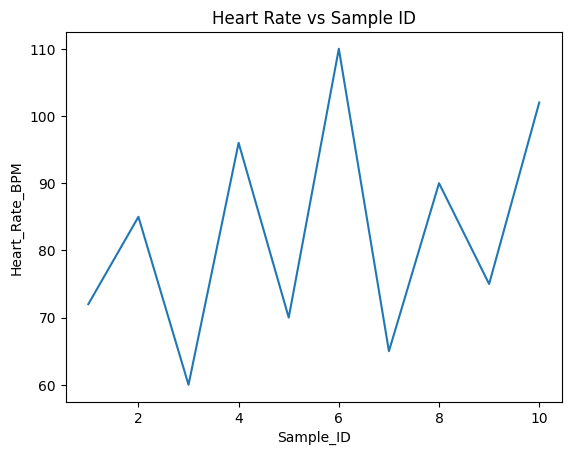

In [21]:
plt.figure()
plt.plot(df["Sample_ID"], df["Heart_Rate_BPM"])
plt.xlabel("Sample_ID")
plt.ylabel("Heart_Rate_BPM")
plt.title("Heart Rate vs Sample ID")
plt.show()

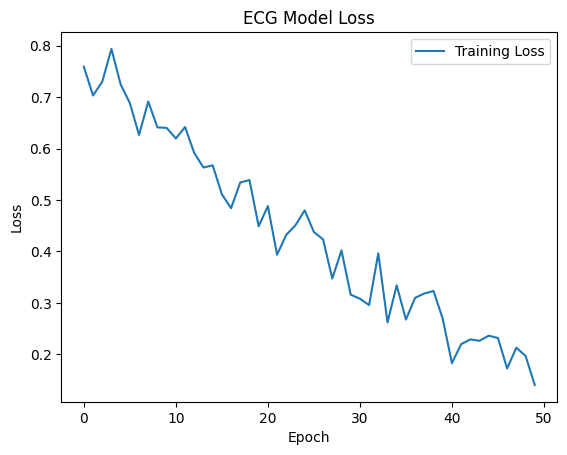

In [22]:
plt.figure()
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('ECG Model Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

In [33]:
model = load_model("ecg_heart_model.h5")
scaler = joblib.load("scaler.pkl")

In [36]:
print("\nEnter ECG Feature Values:")

heart_rate = float(input("Heart Rate (BPM): "))
rr = float(input("RR Interval (ms): "))
qrs = float(input("QRS Duration (ms): "))
p_wave = float(input("P Wave Amplitude (mV): "))
t_wave = float(input("T Wave Amplitude (mV): "))



Enter ECG Feature Values:
Heart Rate (BPM): 72
RR Interval (ms): 833
QRS Duration (ms): 90
P Wave Amplitude (mV): 0.18
T Wave Amplitude (mV): 0.32


In [37]:
user_data = np.array([[heart_rate, rr, qrs, p_wave, t_wave]])

In [38]:
user_scaled = scaler.transform(user_data)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [39]:
prob = model.predict(user_scaled)[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


In [40]:
print("\n-----------------------------")
if prob >= 0.5:
    print("⚠ RESULT: HEART DISEASE DETECTED")
else:
    print("✅ RESULT: PERSON IS NORMAL")

print("Prediction Probability:", round(prob, 3))
print("-----------------------------")


-----------------------------
✅ RESULT: PERSON IS NORMAL
Prediction Probability: 0.238
-----------------------------
